<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw6/hw6_p2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn    as nn
import torch.optim as optim

import numpy   as np
import pandas  as pd
import seaborn as sns

import datetime

import matplotlib.pyplot as plt
from   matplotlib.pyplot import figure

from torchvision  import datasets
from torchvision  import transforms

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Intro_to_ML/hw6/models/'

In [ ]:
cifar10 = datasets.CIFAR10('data', train=True, download=True)      # training set
cifar10_val = datasets.CIFAR10('data', train=False, download=True) # validation set

100%|██████████| 170498071/170498071 [00:02<00:00, 79930185.36it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


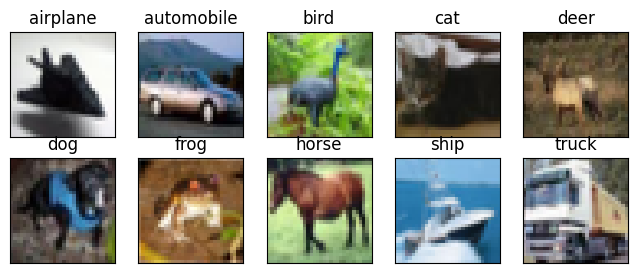

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [ ]:
cifar10 = datasets.CIFAR10('data', train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

cifar10_val = datasets.CIFAR10('data', train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [ ]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 10),
            nn.LogSoftmax(dim=1))

In [ ]:
#count trainable parameter
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]
sum(numel_list)

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)


learning_rate = 0.1
n_epochs = 100


optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()

loss_history = []
start_time = datetime.datetime.now()


for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    loss_history.append(loss.item())

end_time = datetime.datetime.now()

Epoch: 0, Loss: 1.825639
Epoch: 1, Loss: 1.472909
Epoch: 2, Loss: 1.633068
Epoch: 3, Loss: 1.240475
Epoch: 4, Loss: 1.458931
Epoch: 5, Loss: 1.385580
Epoch: 6, Loss: 1.001039
Epoch: 7, Loss: 1.055370
Epoch: 8, Loss: 1.432718
Epoch: 9, Loss: 0.892344
Epoch: 10, Loss: 0.767724
Epoch: 11, Loss: 0.920401
Epoch: 12, Loss: 1.236007
Epoch: 13, Loss: 1.513116
Epoch: 14, Loss: 1.226224
Epoch: 15, Loss: 0.836534
Epoch: 16, Loss: 1.800377
Epoch: 17, Loss: 1.146987
Epoch: 18, Loss: 0.984757
Epoch: 19, Loss: 1.349865
Epoch: 20, Loss: 1.016030
Epoch: 21, Loss: 1.053509
Epoch: 22, Loss: 1.376329
Epoch: 23, Loss: 0.747204
Epoch: 24, Loss: 0.983889
Epoch: 25, Loss: 0.875552
Epoch: 26, Loss: 0.688925
Epoch: 27, Loss: 1.208606
Epoch: 28, Loss: 0.948318
Epoch: 29, Loss: 0.863050
Epoch: 30, Loss: 0.726237
Epoch: 31, Loss: 0.460554
Epoch: 32, Loss: 0.478388
Epoch: 33, Loss: 1.004873
Epoch: 34, Loss: 0.351173
Epoch: 35, Loss: 0.494290
Epoch: 36, Loss: 0.716655
Epoch: 37, Loss: 1.169754
Epoch: 38, Loss: 0.505

In [52]:
training_time = end_time - start_time
print('Training time: ', str(training_time))

Training time:  0:44:09.028903


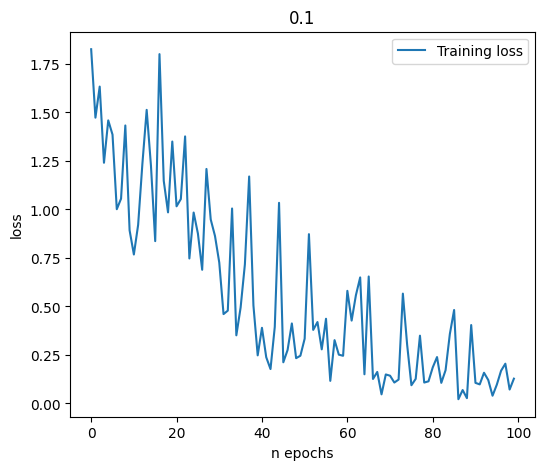

In [55]:
plt.figure
figure(figsize=(6, 5))
plt.plot(loss_history, label="Training loss")
plt.xlabel("n epochs")
plt.ylabel("loss")
plt.legend()
plt.title(learning_rate)
plt.show()

In [56]:
#!!!
#save model
#torch.save(model.state_dict(), file_path+'p2a_0.1.pt')

#Load model
#model.load_state_dict(torch.load(file_path+'p2a_0.05.pt'))

In [57]:
#Validation Set accuarcy

val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Accuracy: 0.420300


In [ ]:
#Training Set accuracy

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Accuracy: 0.999260


Text(0.5, 47.7222222222222, 'Predicted label')

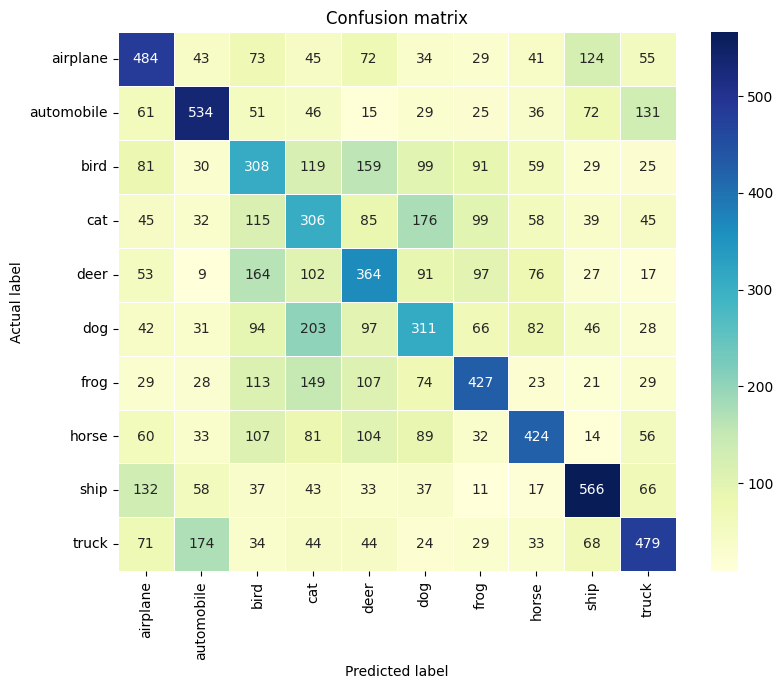

In [58]:
#Confusion matrix
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

nb_classes = 10
cnf_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for imgs, labels in val_loader:

        outputs = model(imgs.view(imgs.shape[0], -1))
        _, preds = torch.max(outputs, 1)

        for t, p in zip(labels.view(-1), preds.view(-1)):
                cnf_matrix[t.long(), p.long()] += 1


# create heatmap
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',linewidths=0.5,  xticklabels=class_names, yticklabels=class_names, ax=ax)

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
cm = pd.DataFrame(cnf_matrix)

recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
f1_score = (2*recall*precision) / (recall+precision)

d = {'class':class_names, 'precision':precision, 'recall':recall, 'f1-score':f1_score}
performance = pd.DataFrame(data = d)
performance

,class,precision,recall,f1-score
0,airplane,0.457467,0.484,0.470360
1,automobile,0.549383,0.534,0.541582
2,bird,0.281022,0.308,0.293893
3,cat,0.268893,0.306,0.286249
4,deer,0.337037,0.364,0.350000
5,dog,0.322614,0.311,0.316701
6,frog,0.471302,0.427,0.448059
7,horse,0.499411,0.424,0.458626
8,ship,0.562624,0.566,0.564307
9,truck,0.514501,0.479,0.496116


In [60]:
precision_mean = np.sum(performance['precision']) / 10
recall_mean = np.sum(performance['recall']) / 10
f1_mean = np.sum(performance['f1-score']) / 10

print('Precision:', precision_mean)
print('Recall:   ', recall_mean)
print('F1-score: ', f1_mean)


Precision: 0.4264253616333008
Recall:    0.4203000068664551
F1-score:  0.42258925437927247
